In [7]:
import pandas as pd

df=pd.read_csv("./ver_1_merge_data.csv")
df

,base_date,emd_cd,korean,long_term_frgn,short_term_frgn,resident,card_cnt,card_amt,waste_cnt,waste_amt
0,2019-11-30,50110250,7.321788e+06,469689.3527,129161.4006,25149,267.380645,9586590.265,620,2279550
1,2019-12-31,50110250,6.915173e+06,482920.2385,122124.6609,25080,266.814465,9621756.255,8178,31493650
2,2020-01-31,50110250,7.476137e+06,587299.9640,112758.3034,25076,257.604430,9648302.136,13042,49632850
3,2020-02-29,50110250,5.561978e+06,559439.3959,60252.7989,25021,249.621160,8760701.457,12264,46197050
4,2020-03-31,50110250,6.094369e+06,714445.0812,29661.4429,24942,261.877023,8979547.945,14316,52561750
...,...,...,...,...,...,...,...,...,...,...
1629,2021-02-28,50130620,4.321265e+06,109325.4866,280.6159,4173,65.216000,2463788.712,4563,15566250
1630,2021-03-31,50130620,4.744309e+06,118258.8891,1475.8404,4178,67.700000,2572585.700,4920,17300600
1631,2021-04-30,50130620,5.236706e+06,129227.7480,1283.0997,4161,68.642336,2473174.901,5256,17646850
1632,2021-05-31,50130620,5.805413e+06,144213.2650,1212.2652,4178,69.333333,2864493.949,6346,19494750


In [8]:
df.columns

Index(['base_date', 'emd_cd', 'korean', 'long_term_frgn', 'short_term_frgn',
       'resident', 'card_cnt', 'card_amt', 'waste_cnt', 'waste_amt'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

x=df[['korean', 'long_term_frgn', 'short_term_frgn',
       'resident', 'card_cnt', 'card_amt', 'waste_cnt']]
y=df[['waste_amt']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [10]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [11]:
y_predict = mlr.predict(x_test)

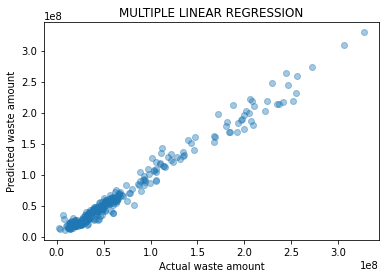

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual waste amount")
plt.ylabel("Predicted waste amount")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [13]:
# 각 변수의 상관계수 확인
print(mlr.coef_)
#'korean', 'long_term_frgn', 'short_term_frgn','resident', 'card_cnt', 'card_amt', 'waste_cnt'

[[ 1.15608925e-01  5.00926171e+00 -6.12362052e+00  9.81532559e+02
  -2.11772105e+05  4.95118492e+00  2.13872114e+03]]


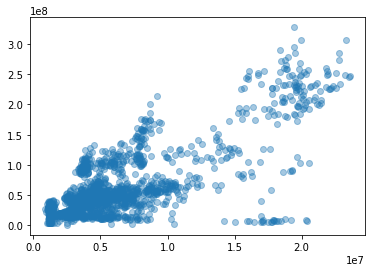

In [14]:
# korean 과 배출량
plt.scatter(df[['korean']], df[['waste_amt']], alpha=0.4)

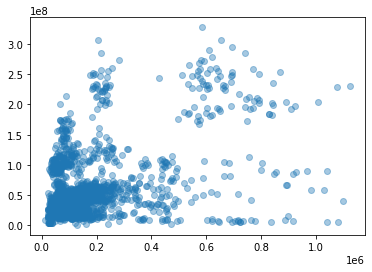

In [15]:
# long_term_frgn 과 배출량
plt.scatter(df[['long_term_frgn']], df[['waste_amt']], alpha=0.4)

#왼쪽 아래에 몰려있음-> box-cox transformation으로 정규화??

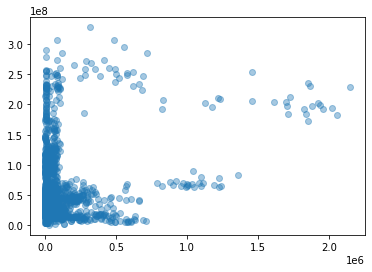

In [16]:
# short_term_frgn 과 배출량
plt.scatter(df[['short_term_frgn']], df[['waste_amt']], alpha=0.4)

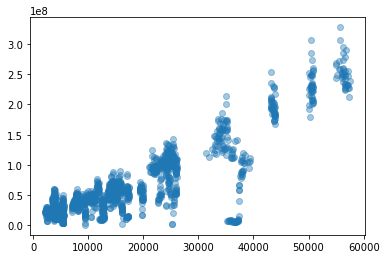

In [17]:
# resident 과 배출량
plt.scatter(df[['resident']], df[['waste_amt']], alpha=0.4)

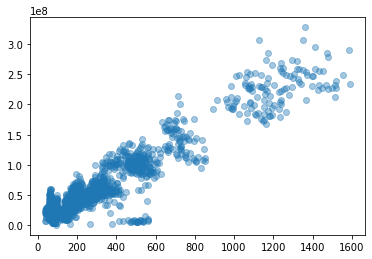

In [18]:
# card_cnt 과 배출량
plt.scatter(df[['card_cnt']], df[['waste_amt']], alpha=0.4)

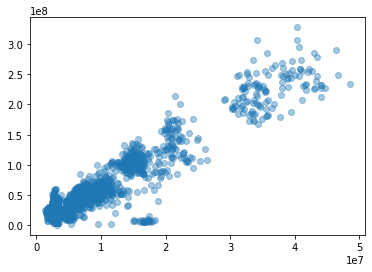

In [19]:
# card_cnt 과 배출량
plt.scatter(df[['card_amt']], df[['waste_amt']], alpha=0.4)

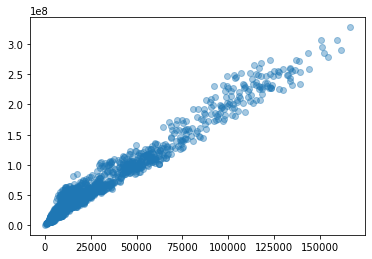

In [20]:
# waste_cnt 과 배출량
plt.scatter(df[['waste_cnt']], df[['waste_amt']], alpha=0.4)

In [28]:
# 결정계수
print(mlr.score(x_train, y_train))

x.shape

0.975839834913147


(1634, 7)

In [34]:
import statsmodels.api as sm

multi_model=sm.OLS(y,x)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              waste_amt   R-squared (uncentered):                   1.023
Model:                            OLS   Adj. R-squared (uncentered):              1.023
Method:                 Least Squares   F-statistic:                         -1.030e+04
Date:                Sun, 05 Sep 2021   Prob (F-statistic):                        1.00
Time:                        02:34:06   Log-Likelihood:                         -28505.
No. Observations:                1634   AIC:                                  5.702e+04
Df Residuals:                    1627   BIC:                                  5.706e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
korean              0.2794      0.106      2.627      0.009       0.071       0.488
long_term_frgn      7.8081      2.171      3.597      0.000       3.550      12.066
short_term_frgn    -5.9226      1.109     -5.341      0.000      -8.097      -3.748
resident         1023.2507     74.603     13.716      0.000     876.923    1169.579
card_cnt        -2.431e+05   9045.702    -26.877      0.000   -2.61e+05   -2.25e+05
card_amt            5.8412      0.348     16.796      0.000       5.159       6.523
waste_cnt        2179.8537     28.906     75.411      0.000    2123.156    2236.551
==============================================================================
Omnibus:                       84.460   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.447
Skew:                          -0.186   Prob(JB):                     7.57e-57
Kurtosis:                       4.913   Cond. No.                     6.36e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

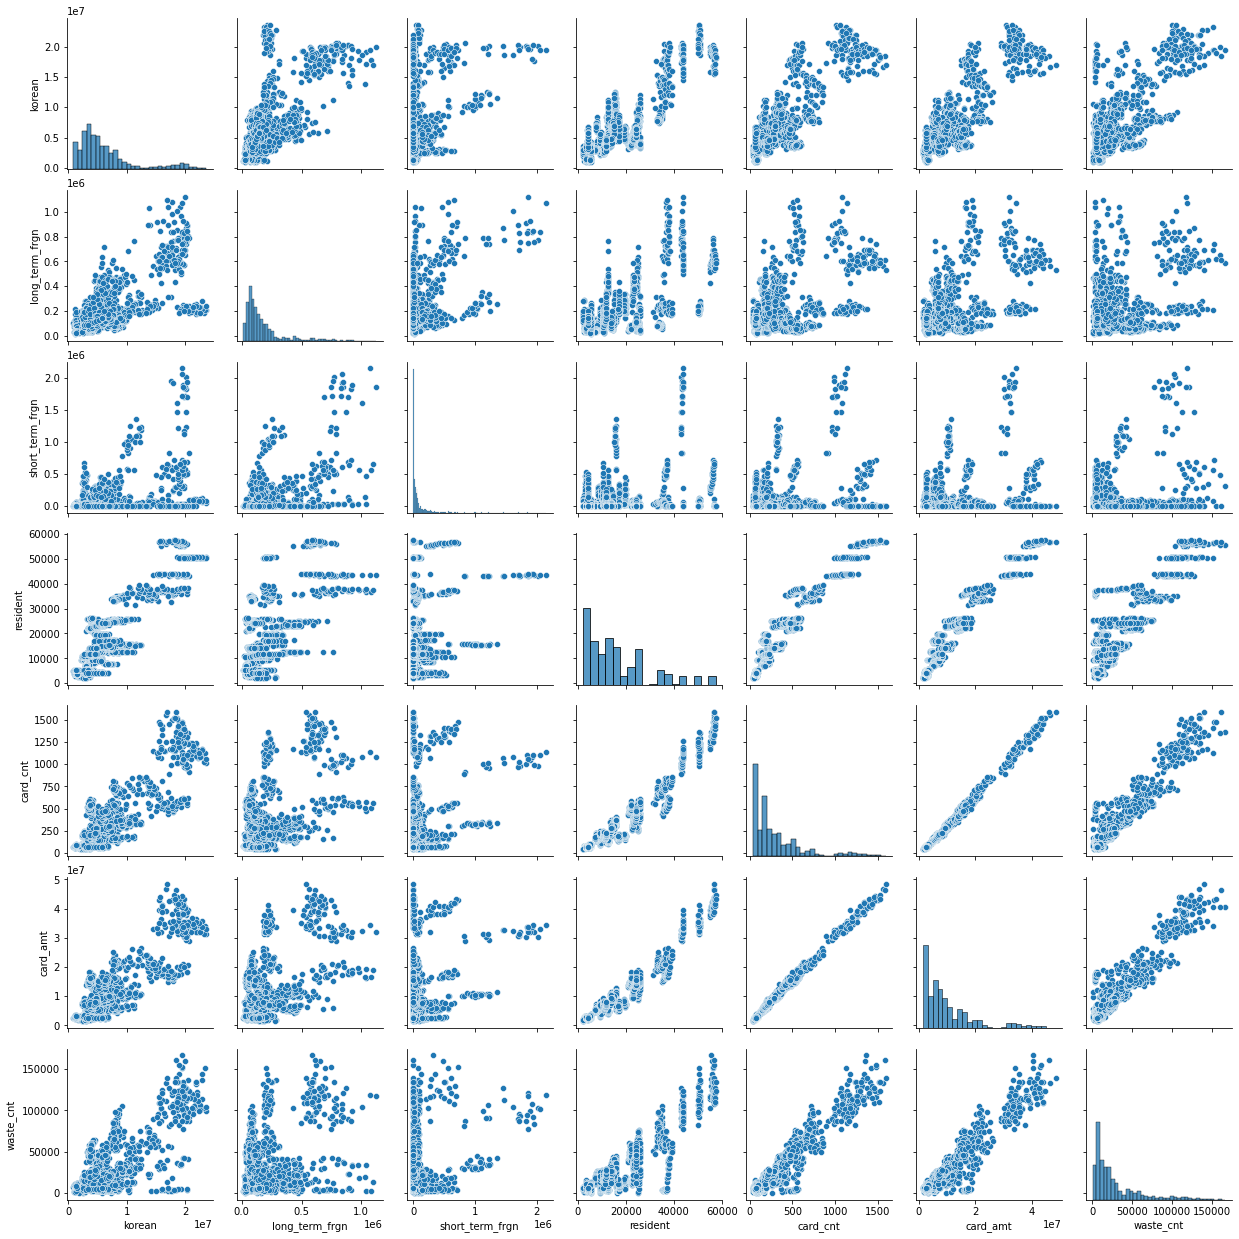

In [37]:
# 변수끼리 산점도(상관성 파악)

import seaborn as sns
sns.pairplot(x)
plt.show()

In [43]:
# 다중공산성 구하기

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

## waste_cnt, resident, **특히 card_cnt, card_amt 다중공산성 겁나높음(보통 기준이 10 넘으면 다중공산성 의심)

,VIF Factor,features
0,14.791989,korean
1,6.416353,long_term_frgn
2,1.873045,short_term_frgn
3,50.095455,resident
4,325.850375,card_cnt
5,453.249192,card_amt
6,29.135129,waste_cnt
